# CMSE 381 Final Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 381 Final Project
### &#9989; Group members: Kyle Landolt, Isaac Maki
### &#9989; Section_001
#### &#9989; 4/16/2025

# ___Can we classify the facial orientation provided to the monkey by measuring if the neuron fires at site 041 and site 157 during the first 400 milliseconds of the monkey being shown the image?___

## Background and Motivation

**We got this motivation by just brainstorming a few problems by checking the dataset. We looked through the data and read the research paper, and decided on this together. There would be many routes you could take in analyzing this data. The researchers analyzed from many different sites in the brains, across multiple different monkeys. However, we wanted to have a simpler question, so we narrowed our study down to two sites to make models that could possibly be applied to other sites as well. We were really intrigued by the fact that monkeys can potentially detect a person's face at certain positions better by measuring certain sites in their brains. We want to discover and see if we are able to predict the facial orientation due to the amount of neural activity spiking in the Monkeys brain within the first 400 millisecond time frame of being shown the photo.**

## Methodology
_(How did you go about answering your question(s)? You should wrote some code here to demonstrate what the data is like and how in principle your method works. You can leave the variations of the related to specific results to the results section.)_

In [2]:
import pandas as pd #This helps us read in the data
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict #This is how the k-fold is used
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay #This displays the confusion matrix after the k-fold cv
import matplotlib.pyplot as plt #This one is for plotting

#Kyle - our current plan is that I will be doing a logistic regression model and Isaac will be doing a decision tree about our research question.
#I am going to go through our old class jupyter notebooks where we worked on logistic regression and set up multiple models with our current dataset. I will
#write a little pseudocode once I get the code going.

In [3]:
data = pd.read_csv('raster_data_lupo_am_site157.csv') #Reads in dataset
data["is_front"] = (data["labels.orientation"] == "front").astype(int) #This creates a new column of just front data to train
X = data.filter(like="time") #This filters the data for all of the time columns (I had to look this one up for all the time parts through ChatGPT)
y = data["is_front"] #assigns y to our dependent variable
from sklearn.linear_model import LogisticRegression #importing LogisticRegression function from sklearn module
from sklearn.model_selection import cross_val_score #
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean accuracy (binary):", scores.mean())

Mean accuracy (binary): 0.8725422160536664


### Data
_(Describe the data you are using. What variables are you using? What they mean? Why did you choose them?)_

**Our dataset consists of a LOT of features, mainly we are looking at the feature "labels.orientation", which is a string that represents what
side of the face the monkey is seeing. Outside of the times, we have 5 other features: "site_info.monkey", "site_info.region"
,"labels.stimID", "labels.person" and "labels.orient_person_combo". These features are important to look at and understand. They give an understanding of how the methodology of the research was carried out. However, they don't really help much in predicting, especially compared to the time frames given. The time frame columns were given by increments of 1 millisecond, all the way to 800ms. However, we dropped all the columns from 401ms to 800ms, as the first 400ms are when the monkey is actually shown the image. Therefore, we used 400 columns, representing each of the milliseconds between 1ms to 400ms, to predict the "label.orientation" column.**

site_info.monkey: "Name of the monkey (always lupo)"

site_info.region: "Region of the brain where the data is being collected from (always am), (I looked it up, this means"

labels.stimID: "An ID number that connects the person and the type of orientation that the picture is"

labels.person: "The person who the picture is of, in this dataset it is 1 0f 25 people" 

labels.orientation: "String that represents what side of the face the monkey is being shown"

labels.orient_person_combo: "Just the orientation and then an int value that is the number in labels.person"

All time variables: "Binary value meaning either 1 or 0 where 1 represents a neural activity spike and 0 represents the other side"


In [4]:
data = pd.read_csv('raster_data_lupo_am_site157.csv')
data.head(5)
#Here is the dataset loaded in and looked at and you can see that the predictors I described in the previous tab are all here

,site_info.monkey,site_info.region,labels.stimID,labels.person,labels.orientation,labels.orient_person_combo,time.1_2,time.2_3,time.3_4,time.4_5,...,time.791_792,time.792_793,time.793_794,time.794_795,time.795_796,time.796_797,time.797_798,time.798_799,time.799_800,time.800_801
0,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lupo,am,1,1,front,front 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lupo,am,2,2,front,front 2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lupo,am,2,2,front,front 2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Models for classification _(if applicable)_
_(What models will you be using for classification? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [5]:
site041_data = pd.read_csv("raster_data_bert_am_site041.csv")
site041_data = site041_data.drop(site041_data.columns[405:806], axis=1)

#splitting based upon predictors (1ms - 400ms) and the label orientation
orientation_labels = site041_data["labels.orientation"]
predictors = site041_data.drop(columns = ["site_info.monkey", "site_info.region", "labels.stimID", "labels.person", "labels.orientation", "labels.orient_person_combo"])
X_train1, X_test1, y_train1, y_test1 = train_test_split(predictors, orientation_labels, test_size=0.2, random_state=1)

In [6]:
#creating the first, most simple tree
first_tree = tree.DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=8, random_state = 1)
first_tree = first_tree.fit(X_train1, y_train1)

y_pred1 = first_tree.predict(X_test1)


The following is code to try and make a new tree that removes all columns that have all 0s or all 1s. This results in 25 columns being removed.

In [7]:
#ChatGPT 4o was utilized to help me understand this. My prompt:

# How would you go about dropping columns in my python dataframe only if they are columns consisting of all 0s or all 1s? My dataframe holds binary data.

zeros_cols = [col for col in predictors.columns if predictors[col].nunique() == 1]
predictors_filtered = predictors.drop(columns=zeros_cols)

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(predictors_filtered, orientation_labels, test_size=0.2, random_state=1)
second_tree = tree.DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=8, random_state = 1)
second_tree = second_tree.fit(X_train2, y_train2)

y_pred2 = second_tree.predict(X_test2)

The following code builds off of the data that had all 400 columns. This time, it combines columns into groups of 50, adding up all of the values along the way. This significantly shortens the width of the data being worked with.

In [9]:
#ChatGPT 4o was utilized to help me understand this. My prompt:

# How would you go about combining my dataframe with 400 columns into a dataframe with only 8 columns? 
# It is binary data, and I would like it to be chunks of 50, where each 50 is the sum of the rows combined by each section of columns.

n_chunks = 8
chunk_size = 50

grouped_data = []

for i in range(n_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk_sum = predictors.iloc[:, start:end].sum(axis=1)
    grouped_data.append(chunk_sum)

X_grouped = pd.concat(grouped_data, axis=1)
X_grouped.columns = [f"chunk_{i+1}" for i in range(n_chunks)]


In [10]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_grouped, orientation_labels, test_size=0.2, random_state=1)
third_tree = tree.DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=8, random_state = 1)
third_tree = third_tree.fit(X_train3, y_train3)

y_pred3 = third_tree.predict(X_test3)

### Models for regression _(if applicable)_
_(What models will you be using for regression? Why did you choose to use them? What questions would you answer with them? How would you evaluate if each model? What cross-validation method did you use?)_

In [11]:
# you may add some code here to show how the model works in principle
data = pd.read_csv('raster_data_lupo_am_site157.csv') #Reads in dataset
data = data.drop(data.columns[405:806], axis = 1)
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    data["is_front"] = (data["labels.orientation"] == orientation).astype(int) #This creates a new column of just front data to train
    X = data.filter(like="time") #This filters the data for all of the time columns (I had to look this one up for all the time parts through ChatGPT)
    y = data["is_front"] #assigns y to our dependent variable
    from sklearn.linear_model import LogisticRegression #importing LogisticRegression function from sklearn module
    from sklearn.model_selection import cross_val_score
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    scores = cross_val_score(clf, X, y, cv=5)

Here is the original Logistic Regression model that was used. The columns are removed and the orientations are defined before the for loop, I used cross validation after initially trying train_test_split to get a more valid score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
data = pd.read_csv('raster_data_lupo_am_site157.csv')
data = data.drop(data.columns[405:806], axis = 1)

This is the code for reading in my imports and splitting up the data. The first 400 is relevant so we are dropping the rest of the columns below that. Other than that these are my imports to make my Logistic Regression model happen

In [15]:
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    X = data.filter(like="time")
    y = (data["labels.orientation"] == orientation).astype(int)
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred, labels=[0, 1])

Here is the code that displays my confusion matrices that display the true and false positives along with the true and false negatives. This is very helpful because it helps you visualize the "Score" that the code has been given which is just the score of correct labels over incorrect labels

### Other methods used _(if applicable)_

_(If this is a preprocessing step to prepare your data for regression or classification models, you should put this subsection before your explanation for the regression or classification models.)_

_(What method did you use otherwise? Why did you choose to use them? What questions would you answer with them? How would you evaluate the results? What cross-validation method did you use when applicable?)_

In [17]:
X = data.filter(like="time")
data["total_spikes"] = X.sum(axis=1)
data.groupby("labels.orientation")["total_spikes"].mean().sort_values(ascending=False)

labels.orientation
right 3/4        1.115385
front            1.036145
up               0.975309
right profile    0.786517
down             0.718310
left 3/4         0.639535
left profile     0.613636
back             0.469880
Name: total_spikes, dtype: float64

In [18]:
X = data.filter(like="time")
spike_counts_per_feature = X.sum(axis=0)
spike_counts_per_feature = spike_counts_per_feature.sort_values(ascending=False)

The above two coding models were ChatGPT inspired. I prompted, "Is there any significance in when the spikes are happening"? And ChatGPT gave me two ideas, to check the times that they were happening, and how often the spikes were happening for each orientation, the results will be talked aout in the results below

# you may add some code here to show how the model works in principle

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

### classification results

This first tree was my first attempt at using a classification tree to predict the orientation based upon the first 400ms of the image being displayed.

[Text(0.5769230769230769, 0.875, 'time.169_170 <= 0.5\ngini = 0.875\nsamples = 1244\nvalue = [165.0, 149.0, 158.0, 157.0, 152.0, 146.0, 162.0, 155.0]\nclass = back'),
 Text(0.3076923076923077, 0.625, 'time.182_183 <= 0.5\ngini = 0.875\nsamples = 1230\nvalue = [165, 149, 149, 156, 152, 145, 162, 152]\nclass = back'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'time.181_182 <= 0.5\ngini = 0.875\nsamples = 1217\nvalue = [165, 148, 143, 156, 152, 145, 161, 147]\nclass = back'),
 Text(0.07692307692307693, 0.125, 'gini = 0.875\nsamples = 1206\nvalue = [165.0, 145.0, 143.0, 155.0, 152.0, 144.0, 161.0, 141.0]\nclass = back'),
 Text(0.23076923076923078, 0.125, 'gini = 0.612\nsamples = 11\nvalue = [0, 3, 0, 1, 0, 1, 0, 6]\nclass = up'),
 Text(0.46153846153846156, 0.375, 'time.267_268 <= 0.5\ngini = 0.627\nsamples = 13\nvalue = [0, 1, 6, 0, 0, 0, 1, 5]\nclass = front'),
 Text(0.38461538461538464, 0.125, 'gini = 0.569\nsamples = 12\nvalue = [0, 1, 6, 0, 0, 0, 0, 5

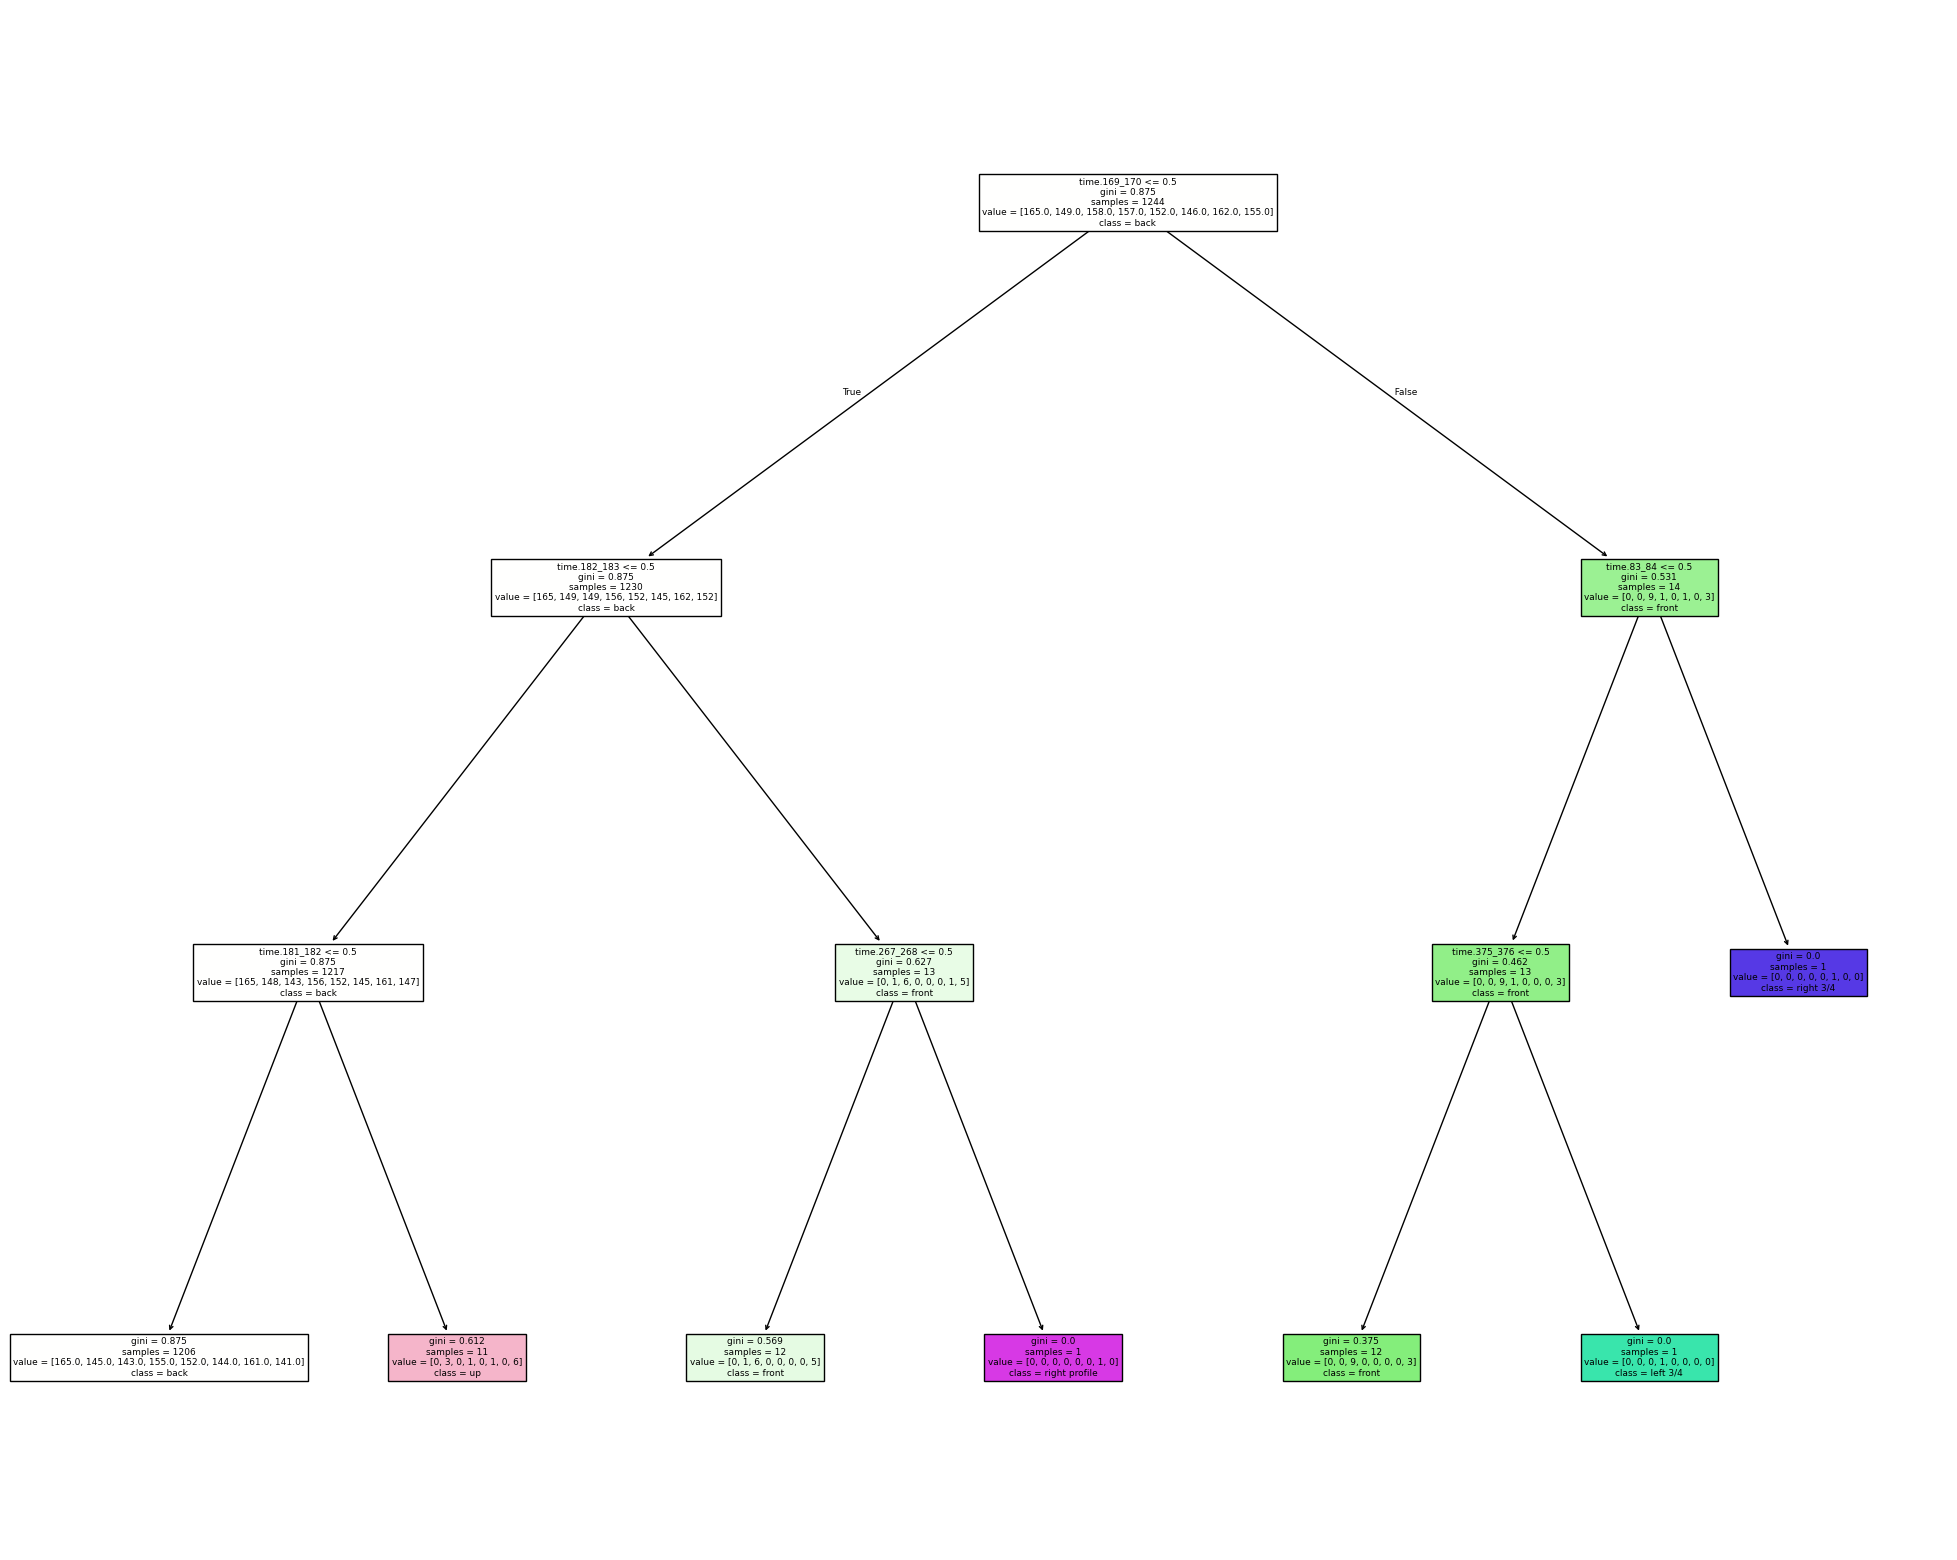

In [15]:
plt.figure(figsize=(25, 20))
plot_tree(first_tree, feature_names=predictors.columns, class_names= first_tree.classes_, filled=True)

In [16]:
accuracies_first = cross_val_score(first_tree, predictors, orientation_labels, cv=5)
print(np.mean(accuracies_first))

0.1317421056970896


The average accuracy was quite poor, at 0.13174. Since there are 8 leaves, we would expect an accuracy of 0.125 when just randomly selecting, which shows our model is barely effective. Therefore, I pursued some routes to see if I could improve upon this model and get a better accuracy. One thing I suspect is that there are too many columns in use. 400 columns is quite a lot, so I want to see if there are any columns that are all 1s or all 0s and are not telling us anything, they are just making the model more cluttered.

[Text(0.5769230769230769, 0.875, 'time.146_147 <= 0.5\ngini = 0.875\nsamples = 1244\nvalue = [165.0, 149.0, 158.0, 157.0, 152.0, 146.0, 162.0, 155.0]\nclass = back'),
 Text(0.3076923076923077, 0.625, 'time.159_160 <= 0.5\ngini = 0.875\nsamples = 1230\nvalue = [165, 149, 149, 156, 152, 145, 162, 152]\nclass = back'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'time.158_159 <= 0.5\ngini = 0.875\nsamples = 1217\nvalue = [165, 148, 143, 156, 152, 145, 161, 147]\nclass = back'),
 Text(0.07692307692307693, 0.125, 'gini = 0.875\nsamples = 1206\nvalue = [165.0, 145.0, 143.0, 155.0, 152.0, 144.0, 161.0, 141.0]\nclass = back'),
 Text(0.23076923076923078, 0.125, 'gini = 0.612\nsamples = 11\nvalue = [0, 3, 0, 1, 0, 1, 0, 6]\nclass = up'),
 Text(0.46153846153846156, 0.375, 'time.244_245 <= 0.5\ngini = 0.627\nsamples = 13\nvalue = [0, 1, 6, 0, 0, 0, 1, 5]\nclass = front'),
 Text(0.38461538461538464, 0.125, 'gini = 0.569\nsamples = 12\nvalue = [0, 1, 6, 0, 0, 0, 0, 5

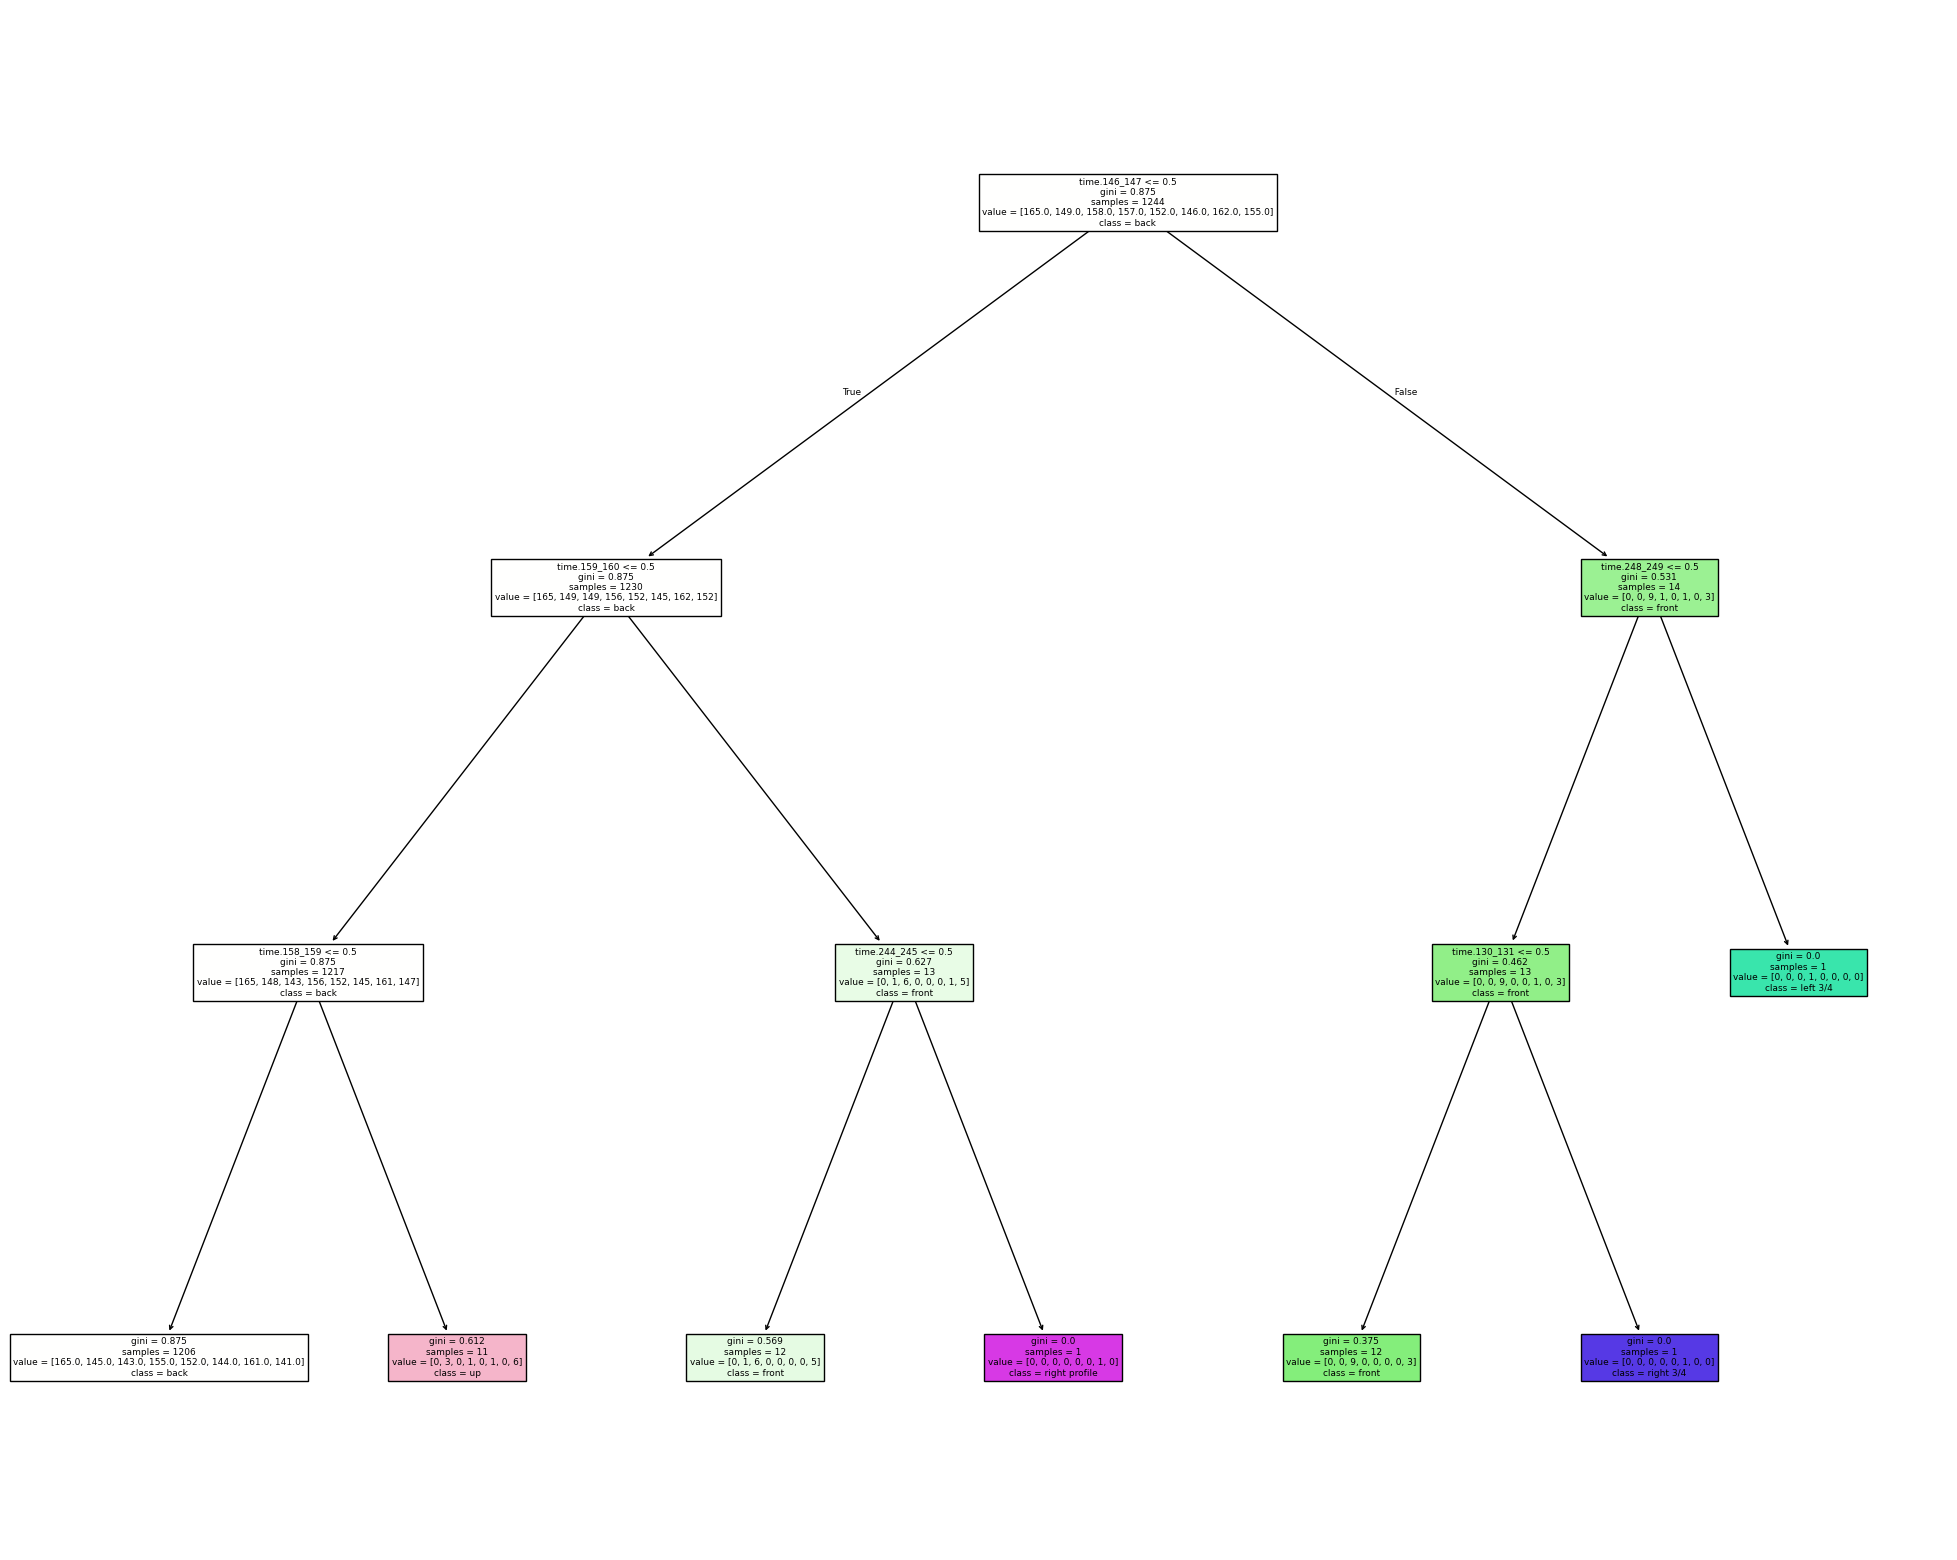

In [17]:
plt.figure(figsize=(25, 20))
plot_tree(second_tree, feature_names=predictors.columns, class_names= second_tree.classes_, filled=True)

In [18]:
accuracies2 = cross_val_score(second_tree, predictors_filtered, orientation_labels, cv=5)

print(np.mean(accuracies2))

0.1317421056970896


This still seemingly is not helping. Therefore, I will try to combine columns together by increments of 50. So, for each row, the sum of 50 continuous cells will be added up, then the next 50 continuous cells will be added up. I will keep the all 0s or all 1s columns, as that should still be relevant when I am combining the columns like this. This dataset with 400 will then be moved into a dataframe with 8 columns, and the same number of rows. I tried multiple groupings, (5, 10, 20, 25, 50) but it seemed that 50 gave the lowest amount of error.

[Text(0.5, 0.875, 'time.4_5 <= 0.5\ngini = 0.875\nsamples = 1244\nvalue = [165.0, 149.0, 158.0, 157.0, 152.0, 146.0, 162.0, 155.0]\nclass = back'),
 Text(0.25, 0.625, 'time.5_6 <= 0.5\ngini = 0.863\nsamples = 874\nvalue = [160, 105, 75, 91, 137, 109, 144, 53]\nclass = back'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'time.3_4 <= 0.5\ngini = 0.853\nsamples = 681\nvalue = [149, 74, 58, 58, 110, 71, 122, 39]\nclass = back'),
 Text(0.0625, 0.125, 'gini = 0.843\nsamples = 585\nvalue = [142, 61, 41, 43, 96, 61, 111, 30]\nclass = back'),
 Text(0.1875, 0.125, 'gini = 0.867\nsamples = 96\nvalue = [7, 13, 17, 15, 14, 10, 11, 9]\nclass = front'),
 Text(0.375, 0.375, 'time.7_8 <= 0.5\ngini = 0.857\nsamples = 193\nvalue = [11.0, 31.0, 17.0, 33.0, 27.0, 38.0, 22.0, 14.0]\nclass = right 3/4'),
 Text(0.3125, 0.125, 'gini = 0.842\nsamples = 150\nvalue = [9, 24, 6, 26, 26, 33, 19, 7]\nclass = right 3/4'),
 Text(0.4375, 0.125, 'gini = 0.834\nsamples = 43\nvalue = [2.0, 7.0, 11.0, 7.0, 1.0, 5.0, 

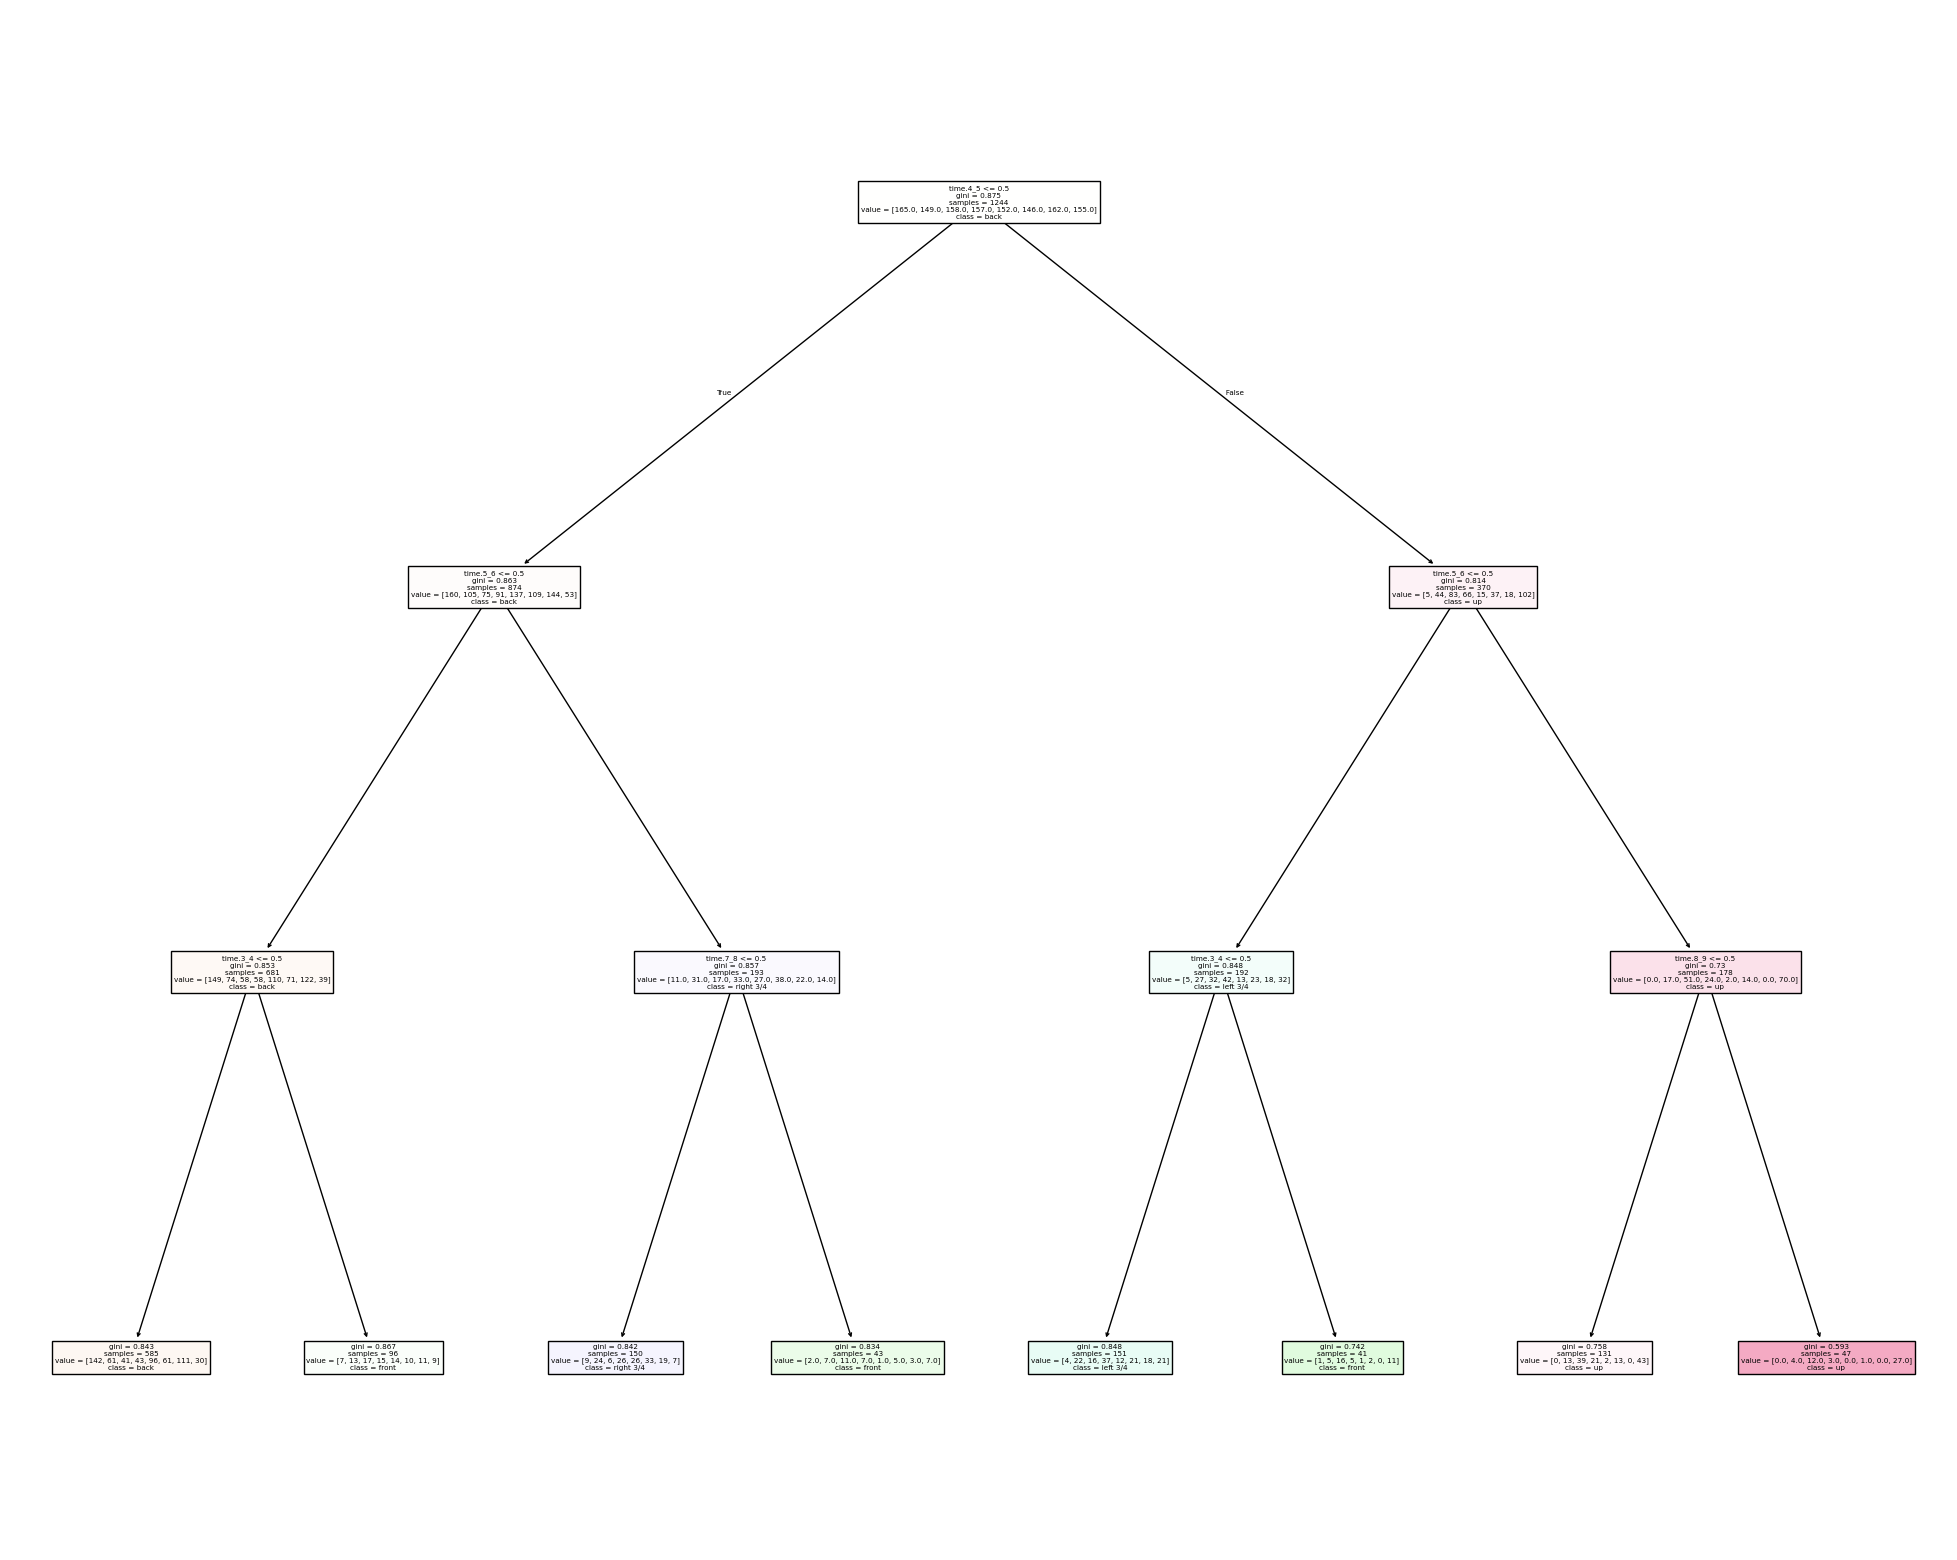

In [19]:
plt.figure(figsize=(25, 20))
plot_tree(third_tree, feature_names=predictors.columns, class_names= third_tree.classes_, filled=True)

In [20]:
accuracies3 = cross_val_score(third_tree, X_grouped, orientation_labels, cv=5)

print(np.mean(accuracies3))

0.23070327314700306


### regression results
_(What are you trying to do here?)_

In [20]:
data = pd.read_csv('raster_data_lupo_am_site157.csv') #Reads in dataset
data = data.drop(data.columns[405:806], axis = 1)
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    data["is_front"] = (data["labels.orientation"] == orientation).astype(int) #This creates a new column of just front data to train
    X = data.filter(like="time") #This filters the data for all of the time columns (I had to look this one up for all the time parts through ChatGPT)
    y = data["is_front"] #assigns y to our dependent variable
    from sklearn.linear_model import LogisticRegression #importing LogisticRegression function from sklearn module
    from sklearn.model_selection import cross_val_score
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"Mean accuracy (binary) {orientation}:", scores.mean())

Mean accuracy (binary) right 3/4: 0.8239879713162157
Mean accuracy (binary) front: 0.8451885264862364
Mean accuracy (binary) left profile: 0.8255378209576684
Mean accuracy (binary) left 3/4: 0.8361323155216285
Mean accuracy (binary) up: 0.8225075179273652
Mean accuracy (binary) back: 0.8543372657876475
Mean accuracy (binary) down: 0.8588595882489012
Mean accuracy (binary) right profile: 0.8225422160536663


Originally, these results were thought to be very good. Unfortunately, using precision, recall, and f1 score; we discovered that this mean accuracy test is pretty unreliable when compared to the bulk of our data.

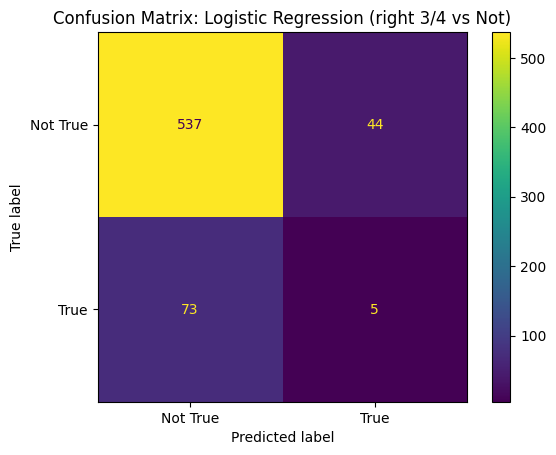

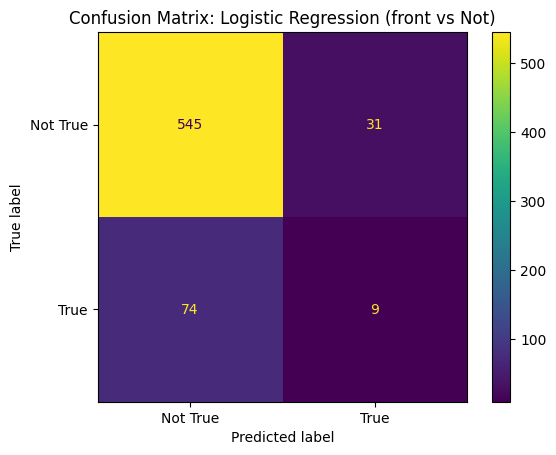

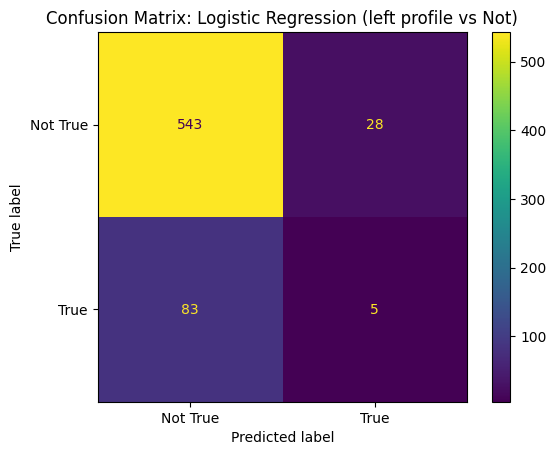

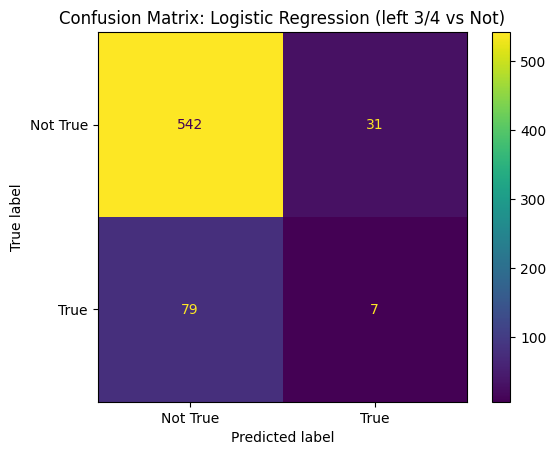

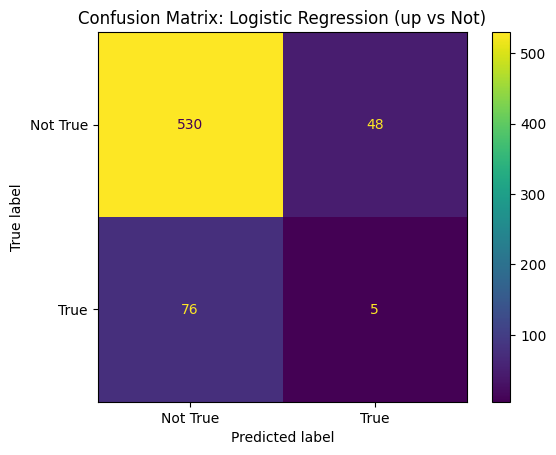

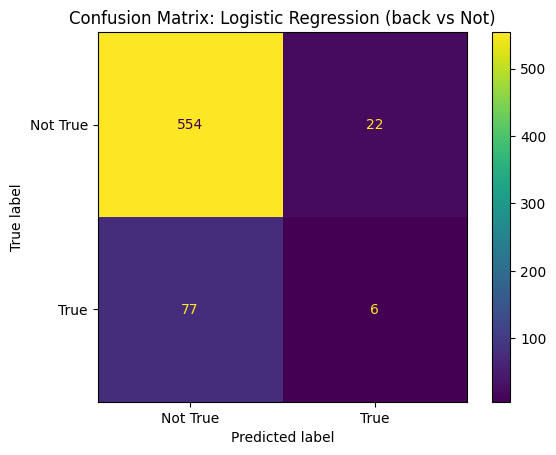

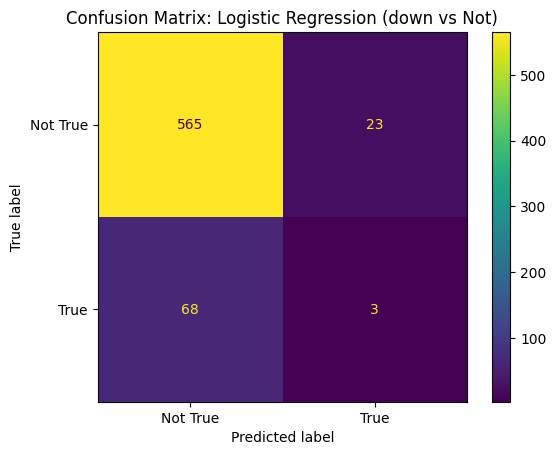

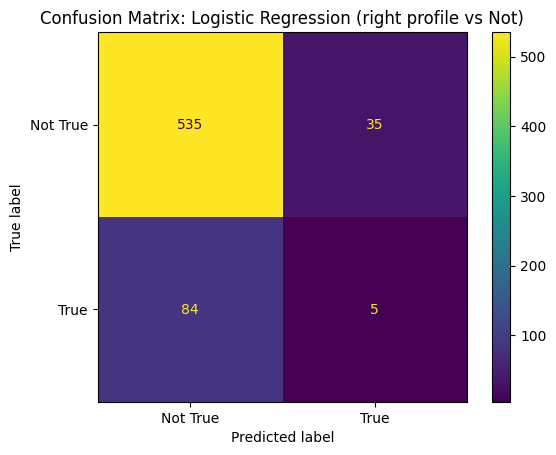

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
data = pd.read_csv('raster_data_lupo_am_site157.csv')
data = data.drop(data.columns[405:806], axis = 1)
orientations = ['right 3/4','front','left profile','left 3/4','up','back','down','right profile']
for orientation in orientations:
    X = data.filter(like="time")
    y = (data["labels.orientation"] == orientation).astype(int)
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not True", "True"])
    disp.plot()
    plt.title(f"Confusion Matrix: Logistic Regression ({orientation} vs Not)")
    plt.show()

Here is a printed confusion matrix of the true/false positives and negatives that the model discovered, unfortunately the data seems very skewed so we are unable to tell if that high accuracy score was do to the skew in the data by the minimal true facial orientations described in the data.

In [24]:
for orientation in orientations:
    data["is_front"] = (data["labels.orientation"] == orientation).astype(int)
    X = data.filter(like="time")
    y = data["is_front"]
    clf = LogisticRegression(max_iter=1000, class_weight='balanced')
    precision_scores = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recall_scores = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1_scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
    print(f"--- {orientation} ---")
    print(f"Mean precision: {precision_scores.mean():.2f}")
    print(f"Mean recall:    {recall_scores.mean():.2f}")
    print(f"Mean F1 score:  {f1_scores.mean():.2f}")
    print()
#This was a prompt from ChatGPT "Are there more ways I can interpret this score?" and ChatGPT told me to use Precision, Recall, and F1 score which
#ended up proving that this model is not a good model for the test question that we were trying to answer

--- right 3/4 ---
Mean precision: 0.09
Mean recall:    0.06
Mean F1 score:  0.08

--- front ---
Mean precision: 0.25
Mean recall:    0.12
Mean F1 score:  0.16

--- left profile ---
Mean precision: 0.05
Mean recall:    0.01
Mean F1 score:  0.02

--- left 3/4 ---
Mean precision: 0.23
Mean recall:    0.09
Mean F1 score:  0.13

--- up ---
Mean precision: 0.06
Mean recall:    0.05
Mean F1 score:  0.06

--- back ---
Mean precision: 0.21
Mean recall:    0.08
Mean F1 score:  0.12

--- down ---
Mean precision: 0.13
Mean recall:    0.04
Mean F1 score:  0.06

--- right profile ---
Mean precision: 0.27
Mean recall:    0.05
Mean F1 score:  0.07



In [25]:
for orientation in orientations:
    data["is_front"] = (data["labels.orientation"] == orientation).astype(int)
    X = data.filter(like="time")
    y = data["is_front"]
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    precision_scores = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recall_scores = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1_scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
    print(f"--- {orientation} ---")
    print(f"Mean precision: {precision_scores.mean():.2f}")
    print(f"Mean recall:    {recall_scores.mean():.2f}")
    print(f"Mean F1 score:  {f1_scores.mean():.2f}")
    print()


--- right 3/4 ---
Mean precision: 0.10
Mean recall:    0.04
Mean F1 score:  0.05

--- front ---
Mean precision: 0.23
Mean recall:    0.06
Mean F1 score:  0.09

--- left profile ---
Mean precision: 0.00
Mean recall:    0.00
Mean F1 score:  0.00

--- left 3/4 ---
Mean precision: 0.14
Mean recall:    0.32
Mean F1 score:  0.13

--- up ---
Mean precision: 0.07
Mean recall:    0.03
Mean F1 score:  0.04

--- back ---
Mean precision: 0.14
Mean recall:    0.89
Mean F1 score:  0.24

--- down ---
Mean precision: 0.09
Mean recall:    0.60
Mean F1 score:  0.15

--- right profile ---
Mean precision: 0.11
Mean recall:    0.63
Mean F1 score:  0.18



In an attempt to improve our model, we decided to stray away from Logistic Regression and attempt a Random forest mode. Overall, we saw improvements in the F1 scores across the board with this change.

_(How do you interpret what you see?)_

_(What are you doing next?)_

Unfortunately, this model has been proven to not be very worthy in terms of accuracy. The original accuracy findings were seemingly false hope. Precision measures few false positives, while Recall measures few false negatives, F1 score is a combined score of recall and precision and is only high if the other two are high. Unfortunately this means we cannot conclude that we are able to detect the facial orientation through testing our firing.

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### discussion on the classification results

**Overall, there were three different trees I made. The first one was basic, with 8 leaves to hopefully optimize for the fact that there were 8 different classifications of orientation labels to predict. This first tree gave a very low accuracy rate at  0.13174, which is barely any better than randomly guessing, which would provide about 0.125. So, I tried to remove all columns that were all 0s or 1s, which ended up removing 25 columns, but still gave the same accuracy rate. Finally I decided to combine each column into groups of 50, summing all of the 1s and 0s up for the rows. This made the data frame a lot skinnier, with just 8 columns being used to predict. This did improve my accuracy score to 0.2307. This is noticeably better, which shows that grouping these columns together was sensible. Each millisecond may have been just too precise of a measure to really make a useful impact on predicting. However, the error rate was still small. It often misclassified. The tree model isn't too successful at classifying the facial orientation provided to the monkey by measuring if the neuron fires at site 041 during the first 400 milliseconds of the monkey being shown the image.** 

### discussion on the regression results

### conclusion and future steps


**When using the classification tree, it seemed that this wasn't the best model to utilize for the question at hand. It frequently gave low accuracy scores. Even the model that combined multiple columns into groups of 50 didn't improve the accuracy significantly. In order to use tree classifications to get better accuracies in the future, I would use a random forest model. This would use multiple decision trees, which may give a broader understanding of the data and get a more accurate prediction more often. It may be that a single tree is too simple to really portray the intricacies found within the 400 columns of time data provided.**

**When using the logistic regression, we disvoered that overall the results were not good. Originally, we thought that this model was perfect and did a wonderful job as it was boasting about an average 82-85% mean average score. I was a little concerned with this data because it seemed that there was a skew in representation as a lot of the models "correctness" was due to the insurmountable not true labels. To check this, I prompted chatgpt to discover another way to view this model to see its effectiveness. ChatGPT told me to look at the precision, recall, and f1 scores correlated with the data. After doing this, I was astonished to see that not only was my regression model not 84% accurate, it had arguably worse scores than Isaac's decision tree. To improve this, I decided to try a random forest classifier instead to see better scores. Overall, I would say that the data did improve, since we saw a 12.5% average F1 score in the random forest which was compared to the 9.7% average in the initially scored model. In conclusion, you cannot detect facial orientation with a logistic regression as it is worse than natural guessing.**

## Author contribution

_Kyle did the logistic regression part and Isaac did the decision tree part. Kyle also did the mini part about the other model with the neural spikes and the beginning methodology/data overview. Isaac did the background and motivation along with helping our results and discussion. We did equal parts on the presentation as well._

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_



    Freiwald, W. A., & Tsao, D. Y. (2010). Functional compartmentalization and viewpoint generalization within the macaque face-processing system. Science, 330(6005), 845-851.

    Meyers, E. M., Borzello, M., Freiwald, W. A., & Tsao, D. (2015). Intelligent information loss: The coding of facial identity, head pose, and non-face information in the macaque face patch system. Journal of Neuroscience, 35(18).
